l0(transl(.0,.0,0.0)*rotz(s:b1)*transl(0.8,.0,.0)*rotx(0.0))
Grip open
Grip close
Grip open
Grip close
Grip open
Moving to: (-0.8, 1.0, 1.4)


{b1: 0.0, e1: 0.0, g1: 0.0, s1: 0.0}

***** Frame: O


Matrix([
[1.0, 0.0, 0.0, 0.0],
[0.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 0.0],
[0.0, 0.0, 0.0, 1.0]])

Matrix([
[1.0, 0.0, 0.0, 0.0],
[0.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 0.0],
[0.0, 0.0, 0.0, 1.0]])

Matrix([
[1.0, 0.0, 0.0, 0.0],
[0.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 0.0],
[0.0, 0.0, 0.0, 1.0]])

Matrix([
[0.0],
[0.0],
[0.0],
[1.0]])

Matrix([
[1.0],
[0.0],
[0.0],
[1.0]])

Matrix([
[0.0],
[1.0],
[0.0],
[1.0]])

***** End frame: O
***** Frame: l0


Matrix([
[1.0, 0.0, 0.0, 0.0],
[0.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 0.0],
[0.0, 0.0, 0.0, 1.0]])

Matrix([
[cos(0.017*b1), -1.0*sin(0.017*b1), 0.0, 0.8*cos(0.017*b1)],
[sin(0.017*b1),      cos(0.017*b1), 0.0, 0.8*sin(0.017*b1)],
[          0.0,                0.0, 1.0,               0.0],
[          0.0,                0.0, 0.0,               1.0]])

Matrix([
[1.0, 0.0, 0.0, 0.8],
[0.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 0.0],
[0.0, 0.0, 0.0, 1.0]])

Matrix([
[0.8],
[0.0],
[0.0],
[1.0]])

Matrix([
[1.8],
[0.0],
[0.0],
[1.0]])

Matrix([
[0.8],
[1.0],
[0.0],
[1.0]])

***** End frame: l0
Link 0


Matrix([
[0.0],
[0.0],
[0.0],
[1.0]])

Matrix([
[0.8],
[0.0],
[0.0],
[1.0]])

Matrix([
[0.8],
[0.0],
[0.0],
[0.0]])

Matrix([
[-0.8*cos(0.0174532925199433*b1) - 0.8],
[-0.8*sin(0.0174532925199433*b1) + 1.0],
[                                  1.4],
[                                    1]])

Es: (4, 1)


Matrix([
[0, 0,                  0, 0],
[0, 0, 0.0139626340159546, 0],
[0, 0,                  0, 0],
[0, 0,                  0, 0]])

Js: (4, 4)


Matrix([
[                                                                    0],
[                                                                    0],
[-5.58505360638185e-5*sin(0.0174532925199433*b1) + 6.98131700797732e-5],
[                                                                    0]])

TypeError: cannot add <class 'sympy.matrices.dense.MutableDenseMatrix'> and <type 'dict'>

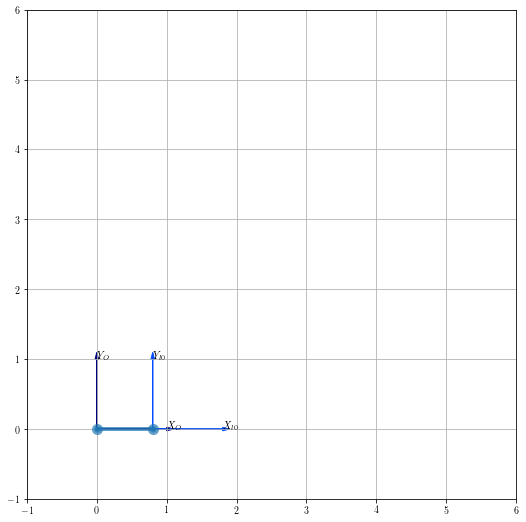

In [4]:
from MeArm import ServoSB
from links import MultiLink
import numpy as np
import sympy as sp
import frames

class MeArm(object):
    def __init__(self):
        # TODO: complete the DH parameters
        self._lengths = [.80, #Shoulder to elbow length
                         .80, #Elbow to wrist length
                         .68] #Wrist to hand length
        self._joints = {frames.SYMB("b1"):0.0, 
                        frames.SYMB("s1"):0.0, 
                        frames.SYMB("e1"):0.0, 
                        frames.SYMB("g1"):0.0}
        # TODO: connect the servos to their pin and select the range of the angles
        DUMMY_VAL = 1,0,180 # Remove this!
        self.servos = {"base":ServoSB( *DUMMY_VAL ),
                      "shoulder":ServoSB( *DUMMY_VAL ),
                      "elbow":ServoSB( *DUMMY_VAL ),
                      "grip":ServoSB( *DUMMY_VAL )}
        
        # Create the body using multilink code and DH parameters
        
        self._body = MultiLink()
        _dh = {"d":[.0],
               "theta":["s:b1"],
               "r":[self._lengths[0]],
               "alpha":[.0]
              }
        self._body.fromDH(_dh)
        self._body.compose(*self._joints.keys())
        self._J = self._body.J.copy()

    def base(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving base to:", angle
        
    def shoulder(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving shoulder to:", angle        
    
    def elbow(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving elbow to:", angle
    
    def gripper(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving gripper to:", angle   
    
    def openGripper(self):
        #TODO: Move the servo to the angle that opens the gripper
        print "Grip open"
    
    def closeGripper(self):
        #TODO: Move the servo to the angle that closes the gripper
        print "Grip close"
    
    def clap(self):
        self.openGripper(); self.closeGripper()
        self.openGripper(); self.closeGripper()
        self.openGripper()        
    
    def readJoints(self):
        # TODO: update joints values from motors
        self._body.bindSymbols(self._joints)
        return self._joints
    
    def getJacobian(self):
        Q = self.readJoints()
        return self._body.getJacobian()
    
    def move(self, **kwargs):
        for k,v in kwargs.items():
            print k, v
    
    def gotoPoint(self, tx, ty, tz, steps=500):
        """ Simple control loop that uses the Jacobian"""
        print "Moving to:",(tx,ty,tz)
        for i in range (steps):
            # Read current joint status
            Q = self.readJoints()
            display(Q)
            
            # Draw current robot position
            self._body.plotLinks(Q)            
            
            # Get position in 3D space (DK)
            pose = self._body.jointsToPosition(Q)            
            # Get distance from target
            E = sp.Matrix([[tx - pose[0]],
                           [ty - pose[1]],
                           [tz - pose[2]],
                           [1]])
            display(E)
            print "Es:",E.shape
            
            #Compute jacobian
            J = self.getJacobian()
            display(J)
            print "Js:",J.shape
            
            # Calculate joint change
            dQ =  J.T * E*0.005
            display(dQ)
            # and use it to update current values
            Q +=  dQ
    
arm = MeArm()
arm.clap()
#Go up and left to grab something
arm.gotoPoint(-.80,1.0,1.4); 
arm.closeGripper();
#Go down, forward and right to drop it
arm.gotoPoint(.70,2.00,.10);
arm.openGripper();
#Back to start position
arm.gotoPoint(0,1.00,.50);

In [ ]:
arm._body